we have new languages and we want to analyze them
- first we'd want to take the floored values of the universals - so that it will give as a binary scores for universal existance
- then, we'd want to calculate the percentage of quantifiers with the universal for each length:
- - so I will go through the numbers, and do sum/count, store it for lagnuage:len:uni-name
- - we can do sub-titles for languages


In [1]:
import pandas as pd
import numpy as np

In [2]:
with open("langs20-09.txt") as f:
    result = open("langs20-09_names.txt",'w') 
    for l in f.readlines():
        l = l[l.find("=")+1:l.find("-")]
        if len(l)>0 and (l[-1] == "S" or l[-1] == "I"):
            result.write(l+"\n")
    result.close()

In [3]:
with open("langs20-09_names.txt") as r:
    langs = []
    for l in r.readlines():
        langs += [l.split()[0]]

In [4]:
langs = ['entail0neg',
 'entail0neg_entail',
 'nand',
 'neg_entail0neg',
 'entail0neg_iff',
 'neg_entail0iff',
 'nor',
 'or0neg',
 'and0neg']
langsN = [l+"N" for l in langs]
langsI = [l+"I" for l in langs]
langsS = [l+"S" for l in langs]

In [5]:
langs

['entail0neg',
 'entail0neg_entail',
 'nand',
 'neg_entail0neg',
 'entail0neg_iff',
 'neg_entail0iff',
 'nor',
 'or0neg',
 'and0neg']

In [6]:
path1 = r"C:\Users\mimis\Desktop\QuantifierComplexity-master\results\Language="
path21 = r"-max_model_size=8\2022-09-21\csv\2022-09-21\language="
path20 = r"-max_model_size=8\2022-09-20\csv\2022-09-20\language="
path22 = r"-max_model_size=8\2022-09-22\csv\2022-09-22\language="
path3 = "-max_model_size=8-max-expr-len="
# "C:\Users\mimis\Desktop\QuantifierComplexity-master\results\Language=or0negN-max_model_size=8\2022-09-22\csv\2022-09-22"
langs_dfs = {}
n9=0
n8=0
for l in langsI+langsS+langsN:
    try:
        langs_dfs[l] = pd.read_csv(path1+l+path22+l+path3+"10.csv")
        n9+=1
    except:
        try:
            langs_dfs[l] = pd.read_csv(path1+l+path22+l+path3+"9.csv")
            n8+=1
        except:
            print(l)


In [7]:
for name,df in langs_dfs.items():
    df["bin-monotonicity"] = np.floor(df.monotonicity)
    df["bin-conservativity"] = np.floor(df.conservativity)
    df["bin-both"] = [int(bool(x) & bool(y)) for (x,y) in zip(df["bin-monotonicity"],df["bin-conservativity"])]
    langs_dfs[name] = df

In [8]:
langs_dfs.keys()

dict_keys(['entail0negI', 'entail0neg_entailI', 'nandI', 'neg_entail0negI', 'entail0neg_iffI', 'neg_entail0iffI', 'norI', 'or0negI', 'and0negI', 'entail0negS', 'entail0neg_entailS', 'nandS', 'neg_entail0negS', 'entail0neg_iffS', 'neg_entail0iffS', 'norS', 'or0negS', 'and0negS', 'entail0negN', 'entail0neg_entailN', 'nandN', 'neg_entail0negN', 'entail0neg_iffN', 'neg_entail0iffN', 'norN', 'or0negN', 'and0negN'])

now we have the binary values. we need to create a df for all the percentages: we need to check how to make sub-indices for diffeent languages so that all the languages will be in the same df and we could have variance plots.

have a glance at the plots we did earlier and make sure the df will be in a similar form.

In [9]:
mono_tab = pd.DataFrame()
cons_tab = pd.DataFrame()
both_tab = pd.DataFrame()

In [10]:
universals = ["monotonicity","conservativity","both"]
uni_dfs = [mono_tab,cons_tab,both_tab]

In [11]:
for name,df in langs_dfs.items():
    for i in range(1,11):
        if max(df.expr_length.astype('str').str.contains(str(i)))==1:
            for u,d in zip(universals,uni_dfs):
                tot=len(df[df.expr_length == i])
                cnt=sum(df["bin-"+u][df.expr_length == i])
                try:
                    perc = cnt/tot
                except:
                    print(name)
                    print(u)
                    print(i)
                    perc = None
                
                #enter the perc to the right column
                d.loc[name,i] = perc            

nandI
monotonicity
6
nandI
conservativity
6
nandI
both
6
norN
monotonicity
5
norN
conservativity
5
norN
both
5


In [12]:
mono_cnt_tab = pd.DataFrame()
cons_cnt_tab = pd.DataFrame()
both_cnt_tab = pd.DataFrame()
uni_cnt_dfs = [mono_cnt_tab,cons_cnt_tab,both_cnt_tab]

In [13]:
for name,df in langs_dfs.items():
    for i in range(1,11):
        if max(df.expr_length.astype('str').str.contains(str(i)))==1:
            for u,d in zip(universals,uni_cnt_dfs):
                tot=len(df[df.expr_length == i])
                cnt=sum(df["bin-"+u][df.expr_length == i])
                
                d.loc[name,i] = int(tot)            

In [14]:
mono_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,0.5,0.8,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909
entail0neg_entailI,0.5,1.0,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923
nandI,0.5,1.0,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333
neg_entail0negI,0.5,0.8,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000
entail0neg_iffI,0.5,1.0,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000
neg_entail0iffI,0.5,1.0,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000
norI,0.5,1.0,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000
or0negI,0.5,0.8,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294
and0negI,0.5,0.8,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000
entail0negS,1.0,1.0,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000


In [15]:
cons_cnt_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,2.0,5.0,5.0,4.0,7.0,10.0,11.0,16.0,16.0,11.0
entail0neg_entailI,2.0,6.0,1.0,9.0,8.0,6.0,28.0,14.0,4.0,26.0
nandI,2.0,4.0,3.0,3.0,2.0,0.0,4.0,5.0,5.0,9.0
neg_entail0negI,2.0,5.0,5.0,2.0,7.0,10.0,7.0,11.0,11.0,8.0
entail0neg_iffI,2.0,4.0,3.0,10.0,10.0,8.0,16.0,24.0,15.0,8.0
neg_entail0iffI,2.0,6.0,1.0,12.0,14.0,3.0,30.0,24.0,2.0,30.0
norI,2.0,4.0,1.0,5.0,4.0,2.0,10.0,4.0,10.0,10.0
or0negI,2.0,5.0,5.0,3.0,8.0,13.0,7.0,7.0,17.0,17.0
and0negI,2.0,5.0,5.0,2.0,2.0,7.0,10.0,7.0,5.0,8.0
entail0negS,2.0,6.0,6.0,8.0,10.0,13.0,20.0,15.0,10.0,13.0


In [58]:
import matplotlib.pyplot as plt
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0, 1, len(langs)))

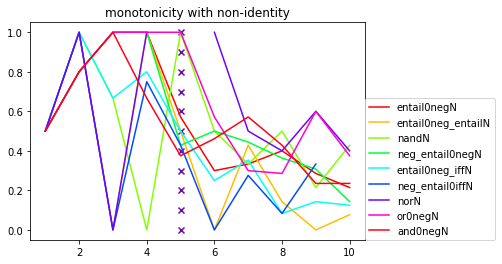

In [67]:
ax = mono_no_opp_tab.transpose().filter(regex="N").plot(color=colors)
ax.scatter([5]*11,[0,0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1],marker='x',color="#6a0dad")
lgd = ax.legend(loc=(1,0))
ax = plt.gca()
title = "monotonicity with non-identity"
ax.set_title(title)
plt.savefig(title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [71]:
mono_no_opp_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,0.5,0.8,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909
entail0neg_entailI,0.5,1.0,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923
nandI,0.5,1.0,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333
neg_entail0negI,0.5,0.8,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000
entail0neg_iffI,0.5,1.0,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000
neg_entail0iffI,0.5,1.0,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000
norI,0.5,1.0,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000
or0negI,0.5,0.8,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294
and0negI,0.5,0.8,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000
entail0negS,1.0,1.0,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000


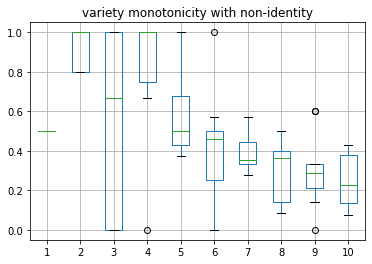

In [72]:
ax = mono_no_opp_tab.filter(regex="N",axis=0).boxplot()
ax = plt.gca()
title = "variety monotonicity with non-identity"
ax.set_title(title)
plt.savefig(title+".png")

change here I to S in order to show the difference between subset and identity and how it affects percentage of monotonicity

C:\Users\mimis\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


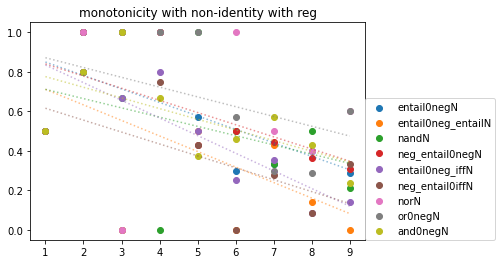

In [68]:
import scipy.stats
ttest = []
for x in range(len(mono_no_opp_tab)):
    title = mono_no_opp_tab.index[x]
    if title[-1] == "S":
        continue
    x_plot = [1,2,3,4,5,6,7,8,9]
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in mono_no_opp_tab[x_plot].iloc[x]]
    
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 9, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
plt.xticks([1,2,3,4,5,6,7,8,9])
lgd = plt.legend(loc=(1,0))
ax = plt.gca()
title = "monotonicity with non-identity with reg"
ax.set_title(title)
plt.savefig(title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    

In [43]:
cons_tab = cons_tab[~cons_tab.index.str.contains("opp")]

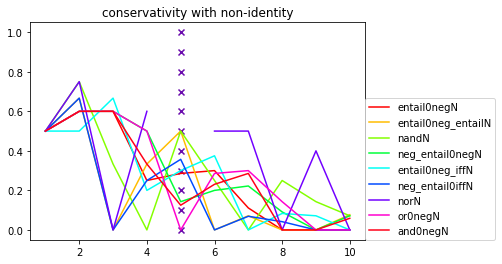

In [57]:
ax = cons_tab.transpose().plot(color=colors)
ax.scatter([5]*11,[0,0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1],marker='x',color="#6a0dad")

lgd = ax.legend(loc=(1,0))
ax = plt.gca()
title = "conservativity with non-identity"
ax.set_title(title)
plt.savefig(title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')

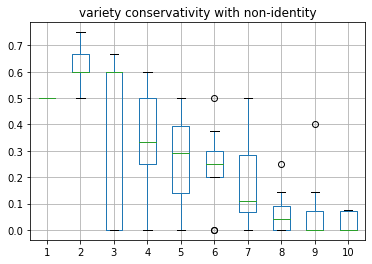

In [65]:
cons_tab.boxplot()
ax = plt.gca()
title = "variety conservativity with non-identity"
ax.set_title(title)
plt.savefig(title+".png")

C:\Users\mimis\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


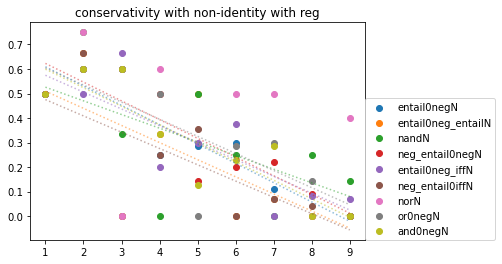

In [67]:
import scipy.stats
ttest = []
for x in range(len(cons_tab)):
    x_plot = [1,2,3,4,5,6,7,8,9]
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in cons_tab[x_plot].iloc[x]]
    title = cons_tab.index[x]
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 9, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
lgd = plt.legend(loc=(1,0))
plt.xticks([1,2,3,4,5,6,7,8,9])
ax = plt.gca()
title = "conservativity with non-identity with reg"
ax.set_title(title)
plt.savefig(title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    

In [48]:
both_tab = both_tab[~both_tab.index.str.contains("opp")]

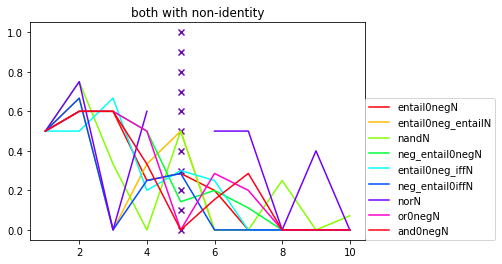

In [60]:
ax = both_tab.transpose().plot(color=colors)
ax.scatter([5]*11,[0,0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1],marker='x',color="#6a0dad")

lgd = ax.legend(loc=(1,0))
ax = plt.gca()
title = "both with non-identity"
ax.set_title(title)
plt.savefig(title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')

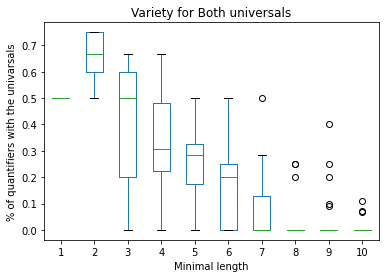

In [136]:
both_tab.filter(regex="\d").drop("orig").boxplot()
ax = plt.gca()
title = "Variety for Both universals"
ax.set_title(title)
ax.set_xlabel("Minimal length")
ax.set_ylabel("% of quantifiers with the univarsals")
ax.grid(False)

plt.savefig(title+".png")

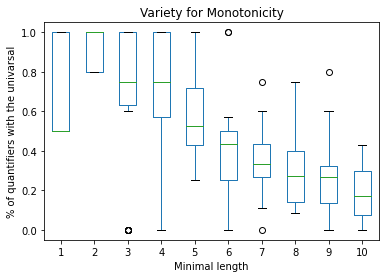

In [137]:
mono_tab.filter(regex="\d").drop("orig").boxplot()
ax = plt.gca()
title = "Variety for Monotonicity"
ax.set_title(title)
ax.set_xlabel("Minimal length")
ax.set_ylabel("% of quantifiers with the univarsal")
ax.grid(False)

plt.savefig(title+".png")

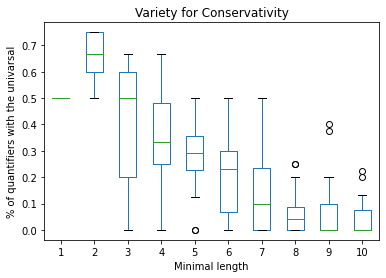

In [138]:
cons_tab.filter(regex="\d").drop("orig").boxplot()
ax = plt.gca()
title = "Variety for Conservativity"
ax.set_title(title)
ax.set_xlabel("Minimal length")
ax.set_ylabel("% of quantifiers with the univarsal")
ax.grid(False)

plt.savefig(title+".png")

In [135]:
mono_tab

,1,2,3,4,5,6,7,8,9,10,pvalue,pass
entail0negI,0.5,0.800000,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909,7.683275e-03,yes
entail0neg_entailI,0.5,1.000000,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923,4.038498e-02,yes
nandI,0.5,1.000000,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333,1.351378e-01,no
neg_entail0negI,0.5,0.800000,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000,2.064647e-02,yes
entail0neg_iffI,0.5,1.000000,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000,1.726275e-03,yes
neg_entail0iffI,0.5,1.000000,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000,8.667510e-02,no
norI,0.5,1.000000,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000,3.234090e-01,no
or0negI,0.5,0.800000,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294,1.049021e-02,yes
and0negI,0.5,0.800000,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000,5.062739e-02,no
entail0negS,1.0,1.000000,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000,5.216455e-06,yes


C:\Users\mimis\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


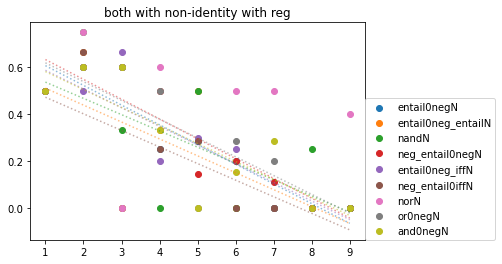

In [69]:
import scipy.stats
ttest = []
for x in range(len(both_tab)):
    x_plot = [1,2,3,4,5,6,7,8,9]
    s = [str(j) for j in x_plot]
    y_plot = [float(i) for i in both_tab[x_plot].iloc[x]]
    title = both_tab.index[x]
    p = plt.scatter(x_plot,y_plot,label=title)
#     plt.plot(x_plot,y_plot,color="gray",alpha=0.2)
    a,b = np.polyfit(x_plot, y_plot, deg=1)
    xnums = np.linspace(1, 9, num=20)
    r = plt.plot(xnums,a*xnums+b,linestyle="dotted",alpha=0.5)
    ry = (r[0].get_ydata())
    ttest+=[scipy.stats.ttest_ind(y_plot,ry)]
lgd = plt.legend(loc=(1,0))
plt.xticks([1,2,3,4,5,6,7,8,9])
ax = plt.gca()
title = "both with non-identity with reg"
ax.set_title(title)
plt.savefig(title+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    

In [360]:
xy = [l[:-1] for l in xy]

In [361]:
xy

['entail0neg',
 'entail0neg_entail',
 'nand',
 'neg_entail0neg',
 'entail0neg_iff',
 'neg_entail0iff',
 'nor',
 'or0neg',
 'and0neg']

In [365]:
cmd1 = r"python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "
for l in xy:
    print(cmd1+"\""+l+"I\"")
    print(cmd1+"\""+l+"S\"")
    print(cmd1+"\""+l+"N\"")

python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "entail0negI"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "entail0negS"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "entail0negN"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "entail0neg_entailI"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "entail0neg_entailS"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "entail0neg_entailN"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "nandI"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "nandS"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size 8 --language_name "nandN"
python src/generate_expressions.py  --max_expr_len 20 --max_model_size

ok so we have all complete languages until length 2(or 3, check)
explain completeness

then we built each complete language with a different kind of "identity" measure, as an example of how a single change can affect the universals and therefore affect the lexicality of the expression

this


In [16]:
orig_mono_data = [1, 0.857143, 0.640777, 0.574257, 0.605484, 0.365458189, 0.278441275]
mono_tab.loc["orig"] = orig_mono_data+[None]*(len(mono_tab.iloc[0])-len(orig_mono_data))

In [17]:
mono_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,0.5,0.800000,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909
entail0neg_entailI,0.5,1.000000,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923
nandI,0.5,1.000000,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333
neg_entail0negI,0.5,0.800000,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000
entail0neg_iffI,0.5,1.000000,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000
neg_entail0iffI,0.5,1.000000,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000
norI,0.5,1.000000,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000
or0negI,0.5,0.800000,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294
and0negI,0.5,0.800000,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000
entail0negS,1.0,1.000000,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000


In [18]:
orig_cons_data = [.75, .510204082, .485436893 , 0.277227723, 0.156127588, 0.198396794, 0.117859824]
cons_tab.loc["orig"] = orig_cons_data+[None]*(len(cons_tab.iloc[0])-len(orig_cons_data))

In [19]:
cons_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,0.50,0.600000,0.600000,0.250000,0.285714,0.300000,0.090909,0.000000,0.000000,0.090909
entail0neg_entailI,0.50,0.666667,0.000000,0.333333,0.500000,0.000000,0.071429,0.000000,0.000000,0.076923
nandI,0.50,0.750000,0.333333,0.666667,0.500000,NaN,0.250000,0.200000,0.200000,0.222222
neg_entail0negI,0.50,0.600000,0.600000,0.500000,0.142857,0.200000,0.285714,0.090909,0.000000,0.000000
entail0neg_iffI,0.50,0.500000,0.666667,0.200000,0.300000,0.375000,0.000000,0.083333,0.066667,0.000000
neg_entail0iffI,0.50,0.666667,0.000000,0.250000,0.357143,0.000000,0.066667,0.041667,0.000000,0.000000
norI,0.50,0.750000,0.000000,0.200000,0.500000,0.500000,0.100000,0.250000,0.100000,0.200000
or0negI,0.50,0.600000,0.600000,0.333333,0.125000,0.230769,0.285714,0.000000,0.000000,0.058824
and0negI,0.50,0.600000,0.600000,0.500000,0.000000,0.285714,0.300000,0.142857,0.000000,0.000000
entail0negS,0.50,0.666667,0.500000,0.250000,0.300000,0.076923,0.000000,0.066667,0.100000,0.000000


In [20]:
orig_both_data = [.75, .510204082, 0.349514563, 0.202970297, 0.133743705, 0.123884132, 0.046406879]
both_tab.loc["orig"] = orig_both_data+[None]*(len(both_tab.iloc[0])-len(orig_both_data))

In [21]:
both_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,0.50,0.600000,0.600000,0.250000,0.285714,0.200000,0.000000,0.00,0.000000,0.000000
entail0neg_entailI,0.50,0.666667,0.000000,0.333333,0.500000,0.000000,0.000000,0.00,0.000000,0.000000
nandI,0.50,0.750000,0.333333,0.666667,0.500000,NaN,0.250000,0.20,0.200000,0.111111
neg_entail0negI,0.50,0.600000,0.600000,0.500000,0.142857,0.200000,0.142857,0.00,0.000000,0.000000
entail0neg_iffI,0.50,0.500000,0.666667,0.200000,0.300000,0.250000,0.000000,0.00,0.000000,0.000000
neg_entail0iffI,0.50,0.666667,0.000000,0.250000,0.285714,0.000000,0.000000,0.00,0.000000,0.000000
norI,0.50,0.750000,0.000000,0.200000,0.500000,0.500000,0.000000,0.25,0.100000,0.000000
or0negI,0.50,0.600000,0.600000,0.333333,0.000000,0.153846,0.285714,0.00,0.000000,0.000000
and0negI,0.50,0.600000,0.600000,0.500000,0.000000,0.285714,0.200000,0.00,0.000000,0.000000
entail0negS,0.50,0.666667,0.500000,0.250000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000


now we will run t-test for each one from orig:

In [22]:
type(uni_dfs)

list

In [269]:
import scipy.stats as sts
linreg_cols = ["slope", "intercept", "rvalue", "pvalue", "stderr"]
for uni_tab in uni_dfs:
    for col in range(len(linreg_cols)-1):
        uni_tab[linreg_cols[col]] = uni_tab.apply(lambda row: sts.linregress([i for i in range(1,11) if not pd.isnull(row[i])],
                                                                 [row[i] for i in range(1,11) if not pd.isnull(row[i])],
                                                                 alternative="less")[col],
                                      axis=1)
    uni_tab["intercept_stderr"] = uni_tab.apply(lambda row: sts.linregress([i for i in range(1,11) if not pd.isnull(row[i])],
                                                                 [row[i] for i in range(1,11) if not pd.isnull(row[i])],
                                                                 alternative="less").intercept_stderr,
                                                axis=1)
    uni_tab["pass"] = uni_tab["pvalue"].apply(lambda x: "yes" if x <= 0.05 else "no")

In [270]:
mono_tab

,1,2,3,4,5,6,7,8,9,10,pvalue,pass,linreg_obj,slope,intercept,rvalue,stderr,intercept_stderr
entail0negI,0.5,0.800000,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909,7.683275e-03,yes,"(-0.0768034238488784, 0.9446753246753247, -0.7...",-0.076803,0.944675,-0.735362,0.025024,0.155269
entail0neg_entailI,0.5,1.000000,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923,4.038498e-02,yes,"(-0.07459207459207459, 0.775091575091575, -0.5...",-0.074592,0.775092,-0.576959,0.037334,0.231651
nandI,0.5,1.000000,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333,1.351378e-01,no,"(-0.03824324324324325, 0.9026576576576576, -0....",-0.038243,0.902658,-0.412193,0.031950,0.198958
neg_entail0negI,0.5,0.800000,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000,2.064647e-02,yes,"(-0.05858520267611178, 0.8942640692640693, -0....",-0.058585,0.894264,-0.651444,0.024123,0.149680
entail0neg_iffI,0.5,1.000000,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000,1.726275e-03,yes,"(-0.08414141414141414, 0.9061111111111111, -0....",-0.084141,0.906111,-0.822933,0.020538,0.127434
neg_entail0iffI,0.5,1.000000,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000,8.667510e-02,no,"(-0.05189033189033189, 0.6482539682539683, -0....",-0.051890,0.648254,-0.467229,0.034716,0.215408
norI,0.5,1.000000,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000,3.234090e-01,no,"(-0.019696969696969702, 0.6633333333333333, -0...",-0.019697,0.663333,-0.165950,0.041382,0.256770
or0negI,0.5,0.800000,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294,1.049021e-02,yes,"(-0.05691886544827721, 0.8404330963154493, -0....",-0.056919,0.840433,-0.711669,0.019865,0.123259
and0negI,0.5,0.800000,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000,5.062739e-02,no,"(-0.05227272727272729, 0.9307142857142858, -0....",-0.052273,0.930714,-0.547678,0.028234,0.175186
entail0negS,1.0,1.000000,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000,5.216455e-06,yes,"(-0.1264957264957265, 1.175213675213675, -0.96...",-0.126496,1.175214,-0.960228,0.013005,0.080692


In [305]:
g=plt.cm.get_cmap('hsv', 4)

In [431]:
def get_regs(tab, pre, name):
    from cycler import cycler
    colors = plt.cm.rainbow(np.linspace(0,1,len(tab)))
    plt.gca().set_prop_cycle(cycler('color', colors))
    for row in (tab.index):
        label = '_nolegend_'
        alphaS = 0 #for data
        alpha = 0.1 #for line

        x = range(1,11)
        y = tab.loc[row][x]*100 #for percentage

        if tab.loc[row].slope == min(tab.drop("orig").slope) or tab.loc[row].slope == max(tab.drop("orig").slope):
            alpha = 1
            label = row
            alphaS = 1

        linestyle = "solid"
        if row == "orig":
            linestyle = "dashed"
            alpha = 1
            alphaS = 1
            label = row
            


        p = plt.plot(x, tab.loc[row].intercept*100 + tab.loc[row].slope*100*x, label=label,
                 alpha=alpha, linestyle=linestyle)
        color = p[0].get_color()

        plt.plot(x, y, ".", alpha=alphaS, c=color)

    fig = plt.gcf()
    fig.set_size_inches(10.5, 6.5)
    
    plt.xlabel("Minimal length")
    plt.xticks(range(1,11))
    plt.ylabel("% of quantifiers with the universal")
    title = pre+" languages' regression lines for "+name
    plt.title(title)
    plt.legend()
    plt.savefig(title+".png")
    plt.show()

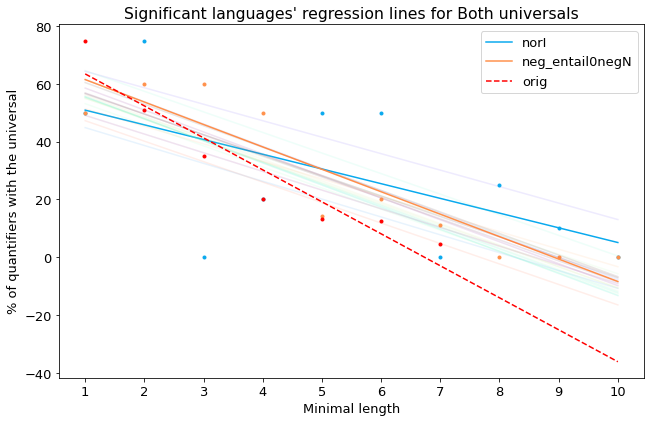

In [432]:
get_regs(both_tab[both_tab["pass"] == "yes"], "Significant", "Both universals")


<AxesSubplot:ylabel='Frequency'>

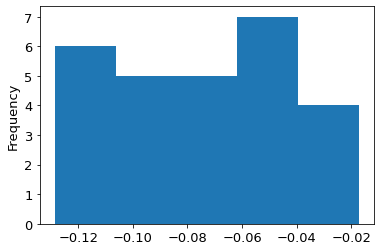

In [325]:
mono_tab.drop("orig").slope.plot.hist(bins=5)

In [299]:
for x in mono_tab.T:
    print(mono_tab.loc[x].intercept)

0.9446753246753247
0.775091575091575
0.9026576576576576
0.8942640692640693
0.9061111111111111
0.6482539682539683
0.6633333333333333
0.8404330963154493
0.9307142857142858
1.175213675213675
1.1735531135531136
1.1166666666666667
1.1570370370370369
1.0671332371332372
1.1013508979775848
1.0850742721330957
1.1248773448773448
1.0740740740740742
0.921904761904762
0.775091575091575
0.7301587301587302
0.92997002997003
0.90484126984127
0.6758118956394819
0.6945945945945947
0.9307142857142858
0.8404330963154493
1.0721284658571428


In [288]:
for row in mono_tab.iterrows():
    print()

1          0.5
2          0.8
3          1.0
4          1.0
5     0.571429
6          0.3
7     0.272727
8        0.375
9       0.3125
10    0.090909
Name: entail0negI, dtype: object
1          0.5
2          1.0
3          0.0
4          1.0
5          0.5
6          0.0
7     0.428571
8     0.142857
9          0.0
10    0.076923
Name: entail0neg_entailI, dtype: object
1          0.5
2          1.0
3     0.666667
4          1.0
5          1.0
6          NaN
7         0.75
8          0.2
9          0.8
10    0.333333
Name: nandI, dtype: object
1          0.5
2          0.8
3          1.0
4          1.0
5     0.428571
6          0.5
7     0.571429
8     0.272727
9     0.272727
10       0.375
Name: neg_entail0negI, dtype: object
1          0.5
2          1.0
3     0.666667
4          0.8
5          0.5
6         0.25
7        0.375
8     0.083333
9     0.133333
10       0.125
Name: entail0neg_iffI, dtype: object
1          0.5
2          1.0
3          0.0
4         0.75
5     0.428571
6

In [259]:
mono_tab.loc["entail0negI", "linreg_obj"]

LinregressResult(slope=-0.0768034238488784, intercept=0.9446753246753247, rvalue=-0.7353621127469447, pvalue=0.007683275197539676, stderr=0.025023923470532287, intercept_stderr=0.1552693618057783)

In [260]:
len(mono_tab.loc["entail0negI", "linreg_obj"])

5

In [263]:
for i in range(len(mono_tab.loc["entail0negI", "linreg_obj"])):
    print(i)
    print(mono_tab.loc["entail0negI", "linreg_obj"][i])

0
-0.0768034238488784
1
0.9446753246753247
2
-0.7353621127469447
3
0.007683275197539676
4
0.025023923470532287


In [267]:
mono_tab.loc["entail0negI", "linreg_obj"][-1]

0.025023923470532287

In [265]:
mono_tab.loc["entail0negI", "linreg_obj"].intercept_stderr

0.1552693618057783

In [255]:
mono_tab

,1,2,3,4,5,6,7,8,9,10,pvalue,pass,linreg_obj,slope,intercept,rvalue,stderr
entail0negI,0.5,0.800000,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909,7.683275e-03,yes,"(-0.0768034238488784, 0.9446753246753247, -0.7...",-0.076803,0.944675,-0.735362,0.025024
entail0neg_entailI,0.5,1.000000,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923,4.038498e-02,yes,"(-0.07459207459207459, 0.775091575091575, -0.5...",-0.074592,0.775092,-0.576959,0.037334
nandI,0.5,1.000000,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333,1.351378e-01,no,"(-0.03824324324324325, 0.9026576576576576, -0....",-0.038243,0.902658,-0.412193,0.031950
neg_entail0negI,0.5,0.800000,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000,2.064647e-02,yes,"(-0.05858520267611178, 0.8942640692640693, -0....",-0.058585,0.894264,-0.651444,0.024123
entail0neg_iffI,0.5,1.000000,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000,1.726275e-03,yes,"(-0.08414141414141414, 0.9061111111111111, -0....",-0.084141,0.906111,-0.822933,0.020538
neg_entail0iffI,0.5,1.000000,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000,8.667510e-02,no,"(-0.05189033189033189, 0.6482539682539683, -0....",-0.051890,0.648254,-0.467229,0.034716
norI,0.5,1.000000,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000,3.234090e-01,no,"(-0.019696969696969702, 0.6633333333333333, -0...",-0.019697,0.663333,-0.165950,0.041382
or0negI,0.5,0.800000,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294,1.049021e-02,yes,"(-0.05691886544827721, 0.8404330963154493, -0....",-0.056919,0.840433,-0.711669,0.019865
and0negI,0.5,0.800000,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000,5.062739e-02,no,"(-0.05227272727272729, 0.9307142857142858, -0....",-0.052273,0.930714,-0.547678,0.028234
entail0negS,1.0,1.000000,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000,5.216455e-06,yes,"(-0.1264957264957265, 1.175213675213675, -0.96...",-0.126496,1.175214,-0.960228,0.013005


In [39]:
sum(mono_tab["pass"]=="yes")

20

In [30]:
(mono_tab["pass"]).count()

28

In [42]:
cons_tab

,1,2,3,4,5,6,7,8,9,10,pvalue,pass
entail0negI,0.50,0.600000,0.600000,0.250000,0.285714,0.300000,0.090909,0.000000,0.000000,0.090909,0.000198,yes
entail0neg_entailI,0.50,0.666667,0.000000,0.333333,0.500000,0.000000,0.071429,0.000000,0.000000,0.076923,0.013501,yes
nandI,0.50,0.750000,0.333333,0.666667,0.500000,NaN,0.250000,0.200000,0.200000,0.222222,0.006852,yes
neg_entail0negI,0.50,0.600000,0.600000,0.500000,0.142857,0.200000,0.285714,0.090909,0.000000,0.000000,0.000159,yes
entail0neg_iffI,0.50,0.500000,0.666667,0.200000,0.300000,0.375000,0.000000,0.083333,0.066667,0.000000,0.000858,yes
neg_entail0iffI,0.50,0.666667,0.000000,0.250000,0.357143,0.000000,0.066667,0.041667,0.000000,0.000000,0.007053,yes
norI,0.50,0.750000,0.000000,0.200000,0.500000,0.500000,0.100000,0.250000,0.100000,0.200000,0.078310,no
or0negI,0.50,0.600000,0.600000,0.333333,0.125000,0.230769,0.285714,0.000000,0.000000,0.058824,0.000351,yes
and0negI,0.50,0.600000,0.600000,0.500000,0.000000,0.285714,0.300000,0.142857,0.000000,0.000000,0.001309,yes
entail0negS,0.50,0.666667,0.500000,0.250000,0.300000,0.076923,0.000000,0.066667,0.100000,0.000000,0.000253,yes


In [44]:
sum(cons_tab["pass"] == "yes")

26

In [45]:
both_tab

,1,2,3,4,5,6,7,8,9,10,pvalue,pass
entail0negI,0.50,0.600000,0.600000,0.250000,0.285714,0.200000,0.000000,0.00,0.000000,0.000000,0.000076,yes
entail0neg_entailI,0.50,0.666667,0.000000,0.333333,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.008811,yes
nandI,0.50,0.750000,0.333333,0.666667,0.500000,NaN,0.250000,0.20,0.200000,0.111111,0.003768,yes
neg_entail0negI,0.50,0.600000,0.600000,0.500000,0.142857,0.200000,0.142857,0.00,0.000000,0.000000,0.000084,yes
entail0neg_iffI,0.50,0.500000,0.666667,0.200000,0.300000,0.250000,0.000000,0.00,0.000000,0.000000,0.000309,yes
neg_entail0iffI,0.50,0.666667,0.000000,0.250000,0.285714,0.000000,0.000000,0.00,0.000000,0.000000,0.005524,yes
norI,0.50,0.750000,0.000000,0.200000,0.500000,0.500000,0.000000,0.25,0.100000,0.000000,0.040192,yes
or0negI,0.50,0.600000,0.600000,0.333333,0.000000,0.153846,0.285714,0.00,0.000000,0.000000,0.000952,yes
and0negI,0.50,0.600000,0.600000,0.500000,0.000000,0.285714,0.200000,0.00,0.000000,0.000000,0.000694,yes
entail0negS,0.50,0.666667,0.500000,0.250000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000,0.000214,yes


In [86]:
import matplotlib.pyplot as plt

Text(0, 0.5, '# of languages')

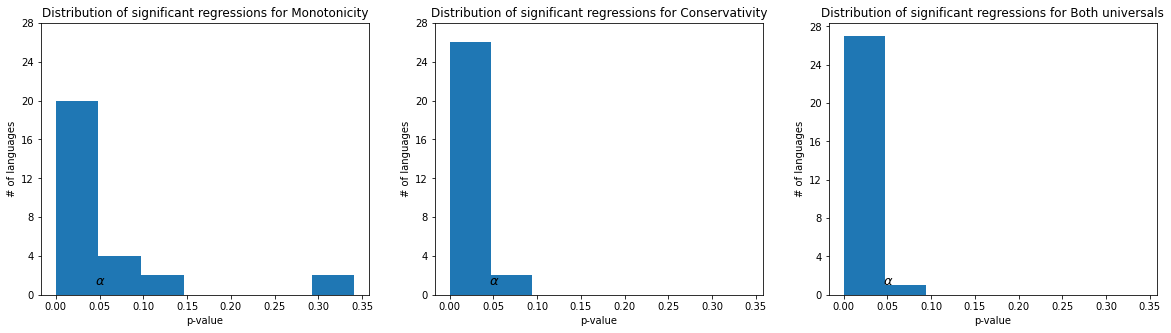

In [125]:
fig, ax = plt.subplots(1,3, sharex=True, figsize=(20,5))

ax[0] = mono_tab.pvalue.hist(bins=7, ax=ax[0])
ax[0].set_yticks(range(0,29,4))
ax[0].grid(False)
ax[0].set_title("Distribution of significant regressions for Monotonicity")
ax[0].text(.045, 1, r"$\alpha$", fontsize=13)
ax[0].set_xlabel("p-value")
ax[0].set_ylabel("# of languages")
xt = ax[0].get_xticks()

ax[1] = cons_tab.pvalue.hist(bins=2, ax=ax[1])
ax[1].set_yticks(range(0,29,4))
ax[1].grid(False)
ax[1].set_title("Distribution of significant regressions for Conservativity")
ax[1].text(.045, 1, r"$\alpha$", fontsize=13)
ax[1].set_xlabel("p-value")
ax[1].set_ylabel("# of languages")

ax[2] = both_tab.pvalue.hist(bins=2, ax=ax[2])
ax[2].set_yticks(range(0,29,4))
ax[2].grid(False)
ax[2].set_title("Distribution of significant regressions for Both universals")
ax[2].text(.045, 1, r"$\alpha$", fontsize=13)
ax[2].set_xlabel("p-value")
ax[2].set_ylabel("# of languages")



# plt.savefig("dist of pvalues for mono.png")

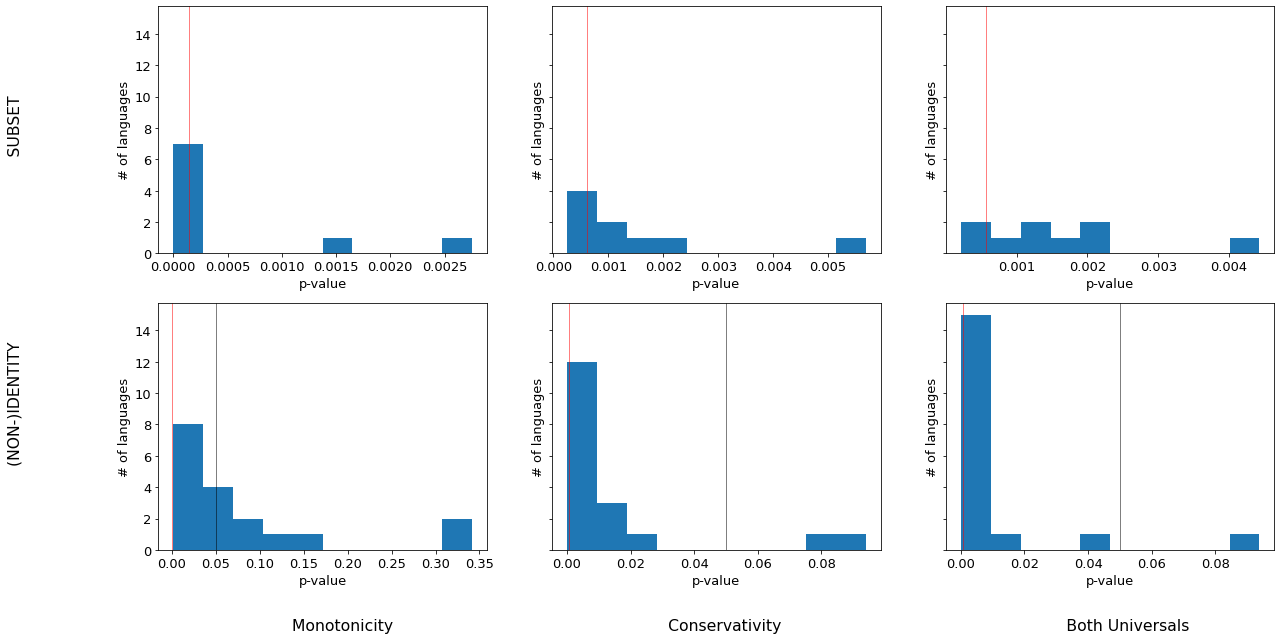

In [236]:
matplotlib.rcParams["font.size"] = 13

nrow = 2
ncol = 3
fig, ax = plt.subplots(nrow, ncol, sharey=True, figsize=(20,10))
#we want to plot in each suplot the dist of a uni with the choice of S vs N/I

uni_dfs_dict = {"Monotonicity":mono_tab,
               "Conservativity":cons_tab,
               "Both Universals":both_tab}

ops = ["S","(N|I)"]

for i in range(nrow):
    op = ops[i]
    for j in range(ncol):
        
        name = list(uni_dfs_dict.keys())[j]
        nbins =  10
        uni_dfs_dict[name].filter(regex=op+"$", axis=0).pvalue.hist( ax=ax[i,j])
        ax[i,j].grid(False)
#         ax[i,j].set_title("Distribution of significant regressions for "+name+" and "+op)
        orig_pvalue = uni_dfs_dict[name].loc["orig"].pvalue
        if i == 1:
            ax[i,j].axvline(.05, color="black", linewidth=0.5)
        ax[i,j].axvline(orig_pvalue, color="red", linewidth=0.5)
        ax[i,j].set_xlabel("p-value")
        ax[i,j].set_ylabel("# of languages")
    

fig.supylabel("(NON-)IDENTITY                                     SUBSET")
fig.supxlabel(" "*17+"Monotonicity"+" "*55+"Conservativity"+" "*57+"Both Universals")
plt.savefig("dist of pvalues 2x3.png")

In [214]:
import matplotlib
matplotlib.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

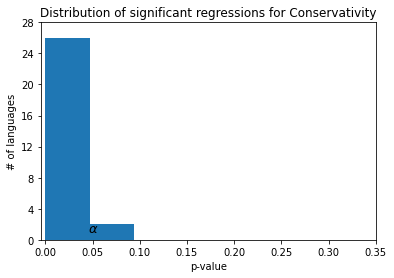

In [201]:
ax = cons_tab.pvalue.hist(bins=2)
ax.set_yticks(range(0,29,4))
ax.set_xticks(xt[1:-1])
ax.grid(False)
ax.set_title("Distribution of significant regressions for Conservativity")
ax.text(.045, 1, r"$\alpha$", fontsize=13)
ax.set_xlabel("p-value")
ax.set_ylabel("# of languages")
plt.savefig("dist of pvalues for cons.png")

In [106]:
uni_df

NameError: name 'uni_df' is not defined

In [368]:
7/27

0.25925925925925924

In [433]:
mono_tab

,1,2,3,4,5,6,7,8,9,10,pvalue,pass,linreg_obj,slope,intercept,rvalue,stderr,intercept_stderr
entail0negI,0.5,0.800000,1.000000,1.000000,0.571429,0.300000,0.272727,0.375000,0.312500,0.090909,7.683275e-03,yes,"(-0.0768034238488784, 0.9446753246753247, -0.7...",-0.076803,0.944675,-0.735362,0.025024,0.155269
entail0neg_entailI,0.5,1.000000,0.000000,1.000000,0.500000,0.000000,0.428571,0.142857,0.000000,0.076923,4.038498e-02,yes,"(-0.07459207459207459, 0.775091575091575, -0.5...",-0.074592,0.775092,-0.576959,0.037334,0.231651
nandI,0.5,1.000000,0.666667,1.000000,1.000000,NaN,0.750000,0.200000,0.800000,0.333333,1.351378e-01,no,"(-0.03824324324324325, 0.9026576576576576, -0....",-0.038243,0.902658,-0.412193,0.031950,0.198958
neg_entail0negI,0.5,0.800000,1.000000,1.000000,0.428571,0.500000,0.571429,0.272727,0.272727,0.375000,2.064647e-02,yes,"(-0.05858520267611178, 0.8942640692640693, -0....",-0.058585,0.894264,-0.651444,0.024123,0.149680
entail0neg_iffI,0.5,1.000000,0.666667,0.800000,0.500000,0.250000,0.375000,0.083333,0.133333,0.125000,1.726275e-03,yes,"(-0.08414141414141414, 0.9061111111111111, -0....",-0.084141,0.906111,-0.822933,0.020538,0.127434
neg_entail0iffI,0.5,1.000000,0.000000,0.750000,0.428571,0.000000,0.266667,0.083333,0.500000,0.100000,8.667510e-02,no,"(-0.05189033189033189, 0.6482539682539683, -0....",-0.051890,0.648254,-0.467229,0.034716,0.215408
norI,0.5,1.000000,0.000000,0.400000,1.000000,1.000000,0.300000,0.750000,0.300000,0.300000,3.234090e-01,no,"(-0.019696969696969702, 0.6633333333333333, -0...",-0.019697,0.663333,-0.165950,0.041382,0.256770
or0negI,0.5,0.800000,1.000000,0.666667,0.375000,0.461538,0.571429,0.428571,0.235294,0.235294,1.049021e-02,yes,"(-0.05691886544827721, 0.8404330963154493, -0....",-0.056919,0.840433,-0.711669,0.019865,0.123259
and0negI,0.5,0.800000,1.000000,1.000000,1.000000,0.571429,0.300000,0.285714,0.600000,0.375000,5.062739e-02,no,"(-0.05227272727272729, 0.9307142857142858, -0....",-0.052273,0.930714,-0.547678,0.028234,0.175186
entail0negS,1.0,1.000000,1.000000,0.500000,0.400000,0.461538,0.300000,0.133333,0.000000,0.000000,5.216455e-06,yes,"(-0.1264957264957265, 1.175213675213675, -0.96...",-0.126496,1.175214,-0.960228,0.013005,0.080692


In [440]:
mono_cnt_tab

,1,2,3,4,5,6,7,8,9,10
entail0negI,2.0,5.0,5.0,4.0,7.0,10.0,11.0,16.0,16.0,11.0
entail0neg_entailI,2.0,6.0,1.0,9.0,8.0,6.0,28.0,14.0,4.0,26.0
nandI,2.0,4.0,3.0,3.0,2.0,0.0,4.0,5.0,5.0,9.0
neg_entail0negI,2.0,5.0,5.0,2.0,7.0,10.0,7.0,11.0,11.0,8.0
entail0neg_iffI,2.0,4.0,3.0,10.0,10.0,8.0,16.0,24.0,15.0,8.0
neg_entail0iffI,2.0,6.0,1.0,12.0,14.0,3.0,30.0,24.0,2.0,30.0
norI,2.0,4.0,1.0,5.0,4.0,2.0,10.0,4.0,10.0,10.0
or0negI,2.0,5.0,5.0,3.0,8.0,13.0,7.0,7.0,17.0,17.0
and0negI,2.0,5.0,5.0,2.0,2.0,7.0,10.0,7.0,5.0,8.0
entail0negS,2.0,6.0,6.0,8.0,10.0,13.0,20.0,15.0,10.0,13.0


In [442]:
(mono_cnt_tab*mono_tab)

,1,2,3,4,5,6,7,8,9,10,intercept,intercept_stderr,linreg_obj,pass,pvalue,rvalue,slope,stderr
and0negI,1.0,4.0,5.0,2.0,2.0,4.0,3.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
and0negN,1.0,4.0,5.0,2.0,3.0,6.0,4.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
and0negS,2.0,6.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0negI,1.0,4.0,5.0,4.0,4.0,3.0,3.0,6.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0negN,1.0,4.0,5.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0negS,2.0,6.0,6.0,4.0,4.0,6.0,6.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0neg_entailI,1.0,6.0,0.0,9.0,4.0,0.0,12.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0neg_entailN,1.0,6.0,0.0,9.0,4.0,0.0,12.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0neg_entailS,2.0,4.0,5.0,8.0,1.0,12.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entail0neg_iffI,1.0,4.0,2.0,8.0,5.0,2.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
